In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
chess_king_rook_vs_king = fetch_ucirepo(id=23) 
  
# data (as pandas dataframes) 
X = chess_king_rook_vs_king.data.features 
y = chess_king_rook_vs_king.data.targets 
  
# metadata 
print(chess_king_rook_vs_king.metadata) 
  
# variable information 
print(chess_king_rook_vs_king.variables) 

{'uci_id': 23, 'name': 'Chess (King-Rook vs. King)', 'repository_url': 'https://archive.ics.uci.edu/dataset/23/chess+king+rook+vs+king', 'data_url': 'https://archive.ics.uci.edu/static/public/23/data.csv', 'abstract': 'Chess Endgame Database for White King and Rook against Black King (KRK).', 'area': 'Games', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 28056, 'num_features': 6, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['white-depth-of-win'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Sat Mar 09 2024', 'dataset_doi': '10.24432/C57W2S', 'creators': ['Michael Bain', 'Arthur Hoff'], 'intro_paper': None, 'additional_info': {'summary': "An Inductive Logic Programming (ILP) or relational learning framework is assumed (Muggleton, 1992). The learning system is provided with examples of chess positions described only by the coordinates

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = X.join(y)
df

,white-king-file,white-king-rank,white-rook-file,white-rook-rank,black-king-file,black-king-rank,white-depth-of-win
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw
...,...,...,...,...,...,...,...
28051,b,1,g,7,e,5,sixteen
28052,b,1,g,7,e,6,sixteen
28053,b,1,g,7,e,7,sixteen
28054,b,1,g,7,f,5,sixteen


# Przygotowanie danych do zadania

* zmapowanie liter na liczby
* dodanie kolumn z metrykami 

In [5]:
files = df["black-king-file"].astype("category").cat.categories
for name in ["white-king-file", "black-king-file", "white-rook-file"]:
    df[name] = df[name].astype("category").cat.codes
df

,white-king-file,white-king-rank,white-rook-file,white-rook-rank,black-king-file,black-king-rank,white-depth-of-win
0,0,1,1,3,2,2,draw
1,0,1,2,1,2,2,draw
2,0,1,2,1,3,1,draw
3,0,1,2,1,3,2,draw
4,0,1,2,2,2,1,draw
...,...,...,...,...,...,...,...
28051,1,1,6,7,4,5,sixteen
28052,1,1,6,7,4,6,sixteen
28053,1,1,6,7,4,7,sixteen
28054,1,1,6,7,5,5,sixteen


In [6]:
files

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], dtype='object')

In [7]:
rank_dist = df["white-king-rank"]-df["black-king-rank"]
file_dist = df["white-king-file"]-df["black-king-file"]
df["euclidean-dist-between-kings"] = np.sqrt(np.square(rank_dist) + np.square(file_dist))
df["manhattan-dist-between-kings"] = np.abs(rank_dist) + np.abs(file_dist)
df["chebyshev-dist-between-kings"] = np.maximum(np.abs(rank_dist), np.abs(file_dist))
df 

,white-king-file,white-king-rank,white-rook-file,white-rook-rank,black-king-file,black-king-rank,white-depth-of-win,euclidean-dist-between-kings,manhattan-dist-between-kings,chebyshev-dist-between-kings
0,0,1,1,3,2,2,draw,2.236068,3,2
1,0,1,2,1,2,2,draw,2.236068,3,2
2,0,1,2,1,3,1,draw,3.000000,3,3
3,0,1,2,1,3,2,draw,3.162278,4,3
4,0,1,2,2,2,1,draw,2.000000,2,2
...,...,...,...,...,...,...,...,...,...,...
28051,1,1,6,7,4,5,sixteen,5.000000,7,4
28052,1,1,6,7,4,6,sixteen,5.830952,8,5
28053,1,1,6,7,4,7,sixteen,6.708204,9,6
28054,1,1,6,7,5,5,sixteen,5.656854,8,4


# Pytanie 1 [2pkt.]

Gdzie zwykle znajduje się na planszy czarny król, kiedy jest matowany (white-depth-of-win=0)? Gdzie znajduje się, kiedy gra kończy się remisem (white-depth-of-win=-1)?

In [8]:
np.unique(df["white-depth-of-win"])

array(['draw', 'eight', 'eleven', 'fifteen', 'five', 'four', 'fourteen',
       'nine', 'one', 'seven', 'six', 'sixteen', 'ten', 'thirteen',
       'three', 'twelve', 'two', 'zero'], dtype=object)

In [9]:
np.unique(df["black-king-rank"]), np.unique(df["black-king-file"]), np.unique(df["white-king-rank"]), np.unique(df["white-king-rank"])

(array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64),
 array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int8),
 array([1, 2, 3, 4], dtype=int64),
 array([1, 2, 3, 4], dtype=int64))

In [10]:
hmap1 = df.loc[df["white-depth-of-win"] == "zero", :].groupby(["black-king-rank", "black-king-file"]).count().loc[:,["white-depth-of-win"]]
tmp = df.groupby(["black-king-rank", "black-king-file"]).count().loc[:, ["euclidean-dist-between-kings"]]
hmap1 = pd.merge(hmap1, tmp, how="right", on=["black-king-file", "black-king-rank"], sort=True).loc[:,["white-depth-of-win"]].reset_index()
hmap1["black-king-file"] = files[hmap1["black-king-file"]]
hmap1["white-depth-of-win"] /= np.sum(hmap1["white-depth-of-win"])
hmap1 = hmap1.pivot(index = "black-king-rank", columns="black-king-file", values="white-depth-of-win").fillna(0)
hmap1

black-king-file,a,b,c,d,e,f,g,h
black-king-rank,,,,,,,,
1,0.444444,0.0,0.185185,0.185185,0.0,0.0,0.0,0.0
2,0.185185,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
6,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
7,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
8,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [11]:
hmap2 = df.loc[df["white-depth-of-win"] == "draw", :].groupby(["black-king-rank", "black-king-file"]).count().loc[:,["white-depth-of-win"]]
tmp = df.groupby(["black-king-rank", "black-king-file"]).count().loc[:, ["euclidean-dist-between-kings"]]
hmap2 = pd.merge(hmap2, tmp, how="right", on=["black-king-file", "black-king-rank"], sort=True).loc[:,["white-depth-of-win"]].reset_index()
hmap2["black-king-file"] = files[hmap2["black-king-file"]]
hmap2["white-depth-of-win"] /= np.sum(hmap2["white-depth-of-win"])
hmap2 = hmap2.pivot(index = "black-king-rank", columns="black-king-file", values="white-depth-of-win").fillna(0)
hmap2

black-king-file,a,b,c,d,e,f,g,h
black-king-rank,,,,,,,,
1,0.008226,0.006438,0.004649,0.007511,0.011803,0.016094,0.017883,0.010730
2,0.007153,0.007511,0.004292,0.008584,0.016810,0.025751,0.028612,0.017883
3,0.008941,0.010372,0.007511,0.011445,0.017167,0.025751,0.028612,0.017883
4,0.010372,0.015379,0.012518,0.015737,0.021102,0.026466,0.028612,0.017883
5,0.010730,0.016810,0.016452,0.016094,0.021459,0.027539,0.028612,0.017883
6,0.010730,0.017167,0.017167,0.017167,0.017167,0.023963,0.028612,0.017883
7,0.010730,0.017167,0.017167,0.017167,0.017167,0.017167,0.024320,0.017883
8,0.006438,0.010730,0.010730,0.010730,0.010730,0.010730,0.010730,0.009299


Text(0.5, 0.98, 'Rozkład położenia czarnego króla na szachownicy')

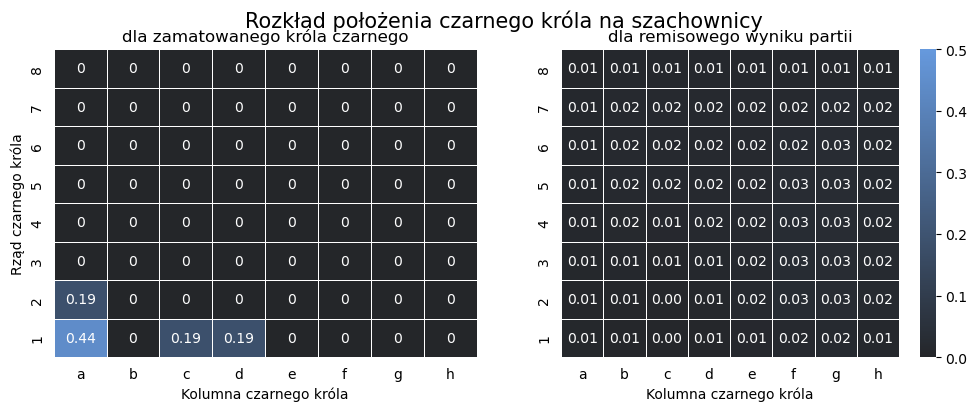

In [12]:
fig, axs = plt.subplots(1, 2, figsize=  (12, 4))

sns.heatmap(hmap1, annot=True, ax=axs[0], linewidth=.5,  vmin=0, vmax=.5, cmap=sns.dark_palette("#69d", as_cmap=True), cbar=False)
axs[0].set_title("dla zamatowanego króla czarnego")
axs[0].invert_yaxis()
axs[0].set(ylabel="Rząd czarnego króla", xlabel="Kolumna czarnego króla")
axs[0].tick_params(left=False, bottom=False)

sns.heatmap(hmap2, annot=True, fmt=".2f", ax=axs[1], linewidth=.5, vmin=0, vmax=.5, cmap=sns.dark_palette("#69d", as_cmap=True))
axs[1].set_title("dla remisowego wyniku partii")
axs[1].invert_yaxis()
axs[1].set(ylabel="", xlabel="Kolumna czarnego króla")
axs[1].tick_params(left=False, bottom=False)

fig.suptitle('Rozkład położenia czarnego króla na szachownicy', fontsize=15)

# Odp1:

Kiedy król jest matowany to najczęściej znajduje się na krańcu szachownicy: widzimy, że w jednym z rogów i na trzech polach krańca szachownicy. Biorąc poprawkęna symetrię jest on matowany na każdym pól z krańca szachownicy.

Natomiast remis jest mniej więcej rozłożony po równa na całej szachownicy. Jest to zaskakujące, gdyż zapatować króla możnaby było tylko w rogu. Ten wynik może być spowodowany pozycją innych figur na szachownicy lub sytuacji, która w danych nie jest zawarta

# Pytanie 2 [2pkt.]

Jednym z istotnych czynników tego, w ilu ruchach gra się zakończy jest dystans pomiędzy białym królem a czarnym królem. Jaka metryka dystansu (Euklidesowa, Manhattan, lub Czebyszewa) pomiędzy nimi pozwoli najlepiej oszacować liczbę ruchów do zakończenia gry? Do tej analizy zignoruj sytuacje remisowe (white-depth-of-win = -1).

In [13]:
label_to_num = {
    "zero": 0,
    "one": 1,
    "two": 2,
    "three": 3,
    "four": 4,
    "five": 5,
    "six": 6,
    "seven": 7,
    "eight": 8,
    "nine": 9,
    "ten": 10,
    "eleven": 11,
    "twelve": 12,
    "thirteen": 13,
    "fourteen": 14,
    "fifteen": 15,
    "sixteen": 16,
    "draw": -1
}

df["win_depth_num"] = df["white-depth-of-win"].map(label_to_num)
df


,white-king-file,white-king-rank,white-rook-file,white-rook-rank,black-king-file,black-king-rank,white-depth-of-win,euclidean-dist-between-kings,manhattan-dist-between-kings,chebyshev-dist-between-kings,win_depth_num
0,0,1,1,3,2,2,draw,2.236068,3,2,-1
1,0,1,2,1,2,2,draw,2.236068,3,2,-1
2,0,1,2,1,3,1,draw,3.000000,3,3,-1
3,0,1,2,1,3,2,draw,3.162278,4,3,-1
4,0,1,2,2,2,1,draw,2.000000,2,2,-1
...,...,...,...,...,...,...,...,...,...,...,...
28051,1,1,6,7,4,5,sixteen,5.000000,7,4,16
28052,1,1,6,7,4,6,sixteen,5.830952,8,5,16
28053,1,1,6,7,4,7,sixteen,6.708204,9,6,16
28054,1,1,6,7,5,5,sixteen,5.656854,8,4,16


In [23]:
df1 = df.loc[~(df["white-depth-of-win"] == "draw"),:]
df1

,white-king-file,white-king-rank,white-rook-file,white-rook-rank,black-king-file,black-king-rank,white-depth-of-win,euclidean-dist-between-kings,manhattan-dist-between-kings,chebyshev-dist-between-kings,win_depth_num
2796,2,1,0,3,0,1,zero,2.000000,2,2,0
2797,2,1,0,4,0,1,zero,2.000000,2,2,0
2798,2,1,0,5,0,1,zero,2.000000,2,2,0
2799,2,1,0,6,0,1,zero,2.000000,2,2,0
2800,2,1,0,7,0,1,zero,2.000000,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...
28051,1,1,6,7,4,5,sixteen,5.000000,7,4,16
28052,1,1,6,7,4,6,sixteen,5.830952,8,5,16
28053,1,1,6,7,4,7,sixteen,6.708204,9,6,16
28054,1,1,6,7,5,5,sixteen,5.656854,8,4,16


Text(0.5, 0.98, 'Wykres zależności liczby ruchów do mata w zależności od odległości królów od siebie')

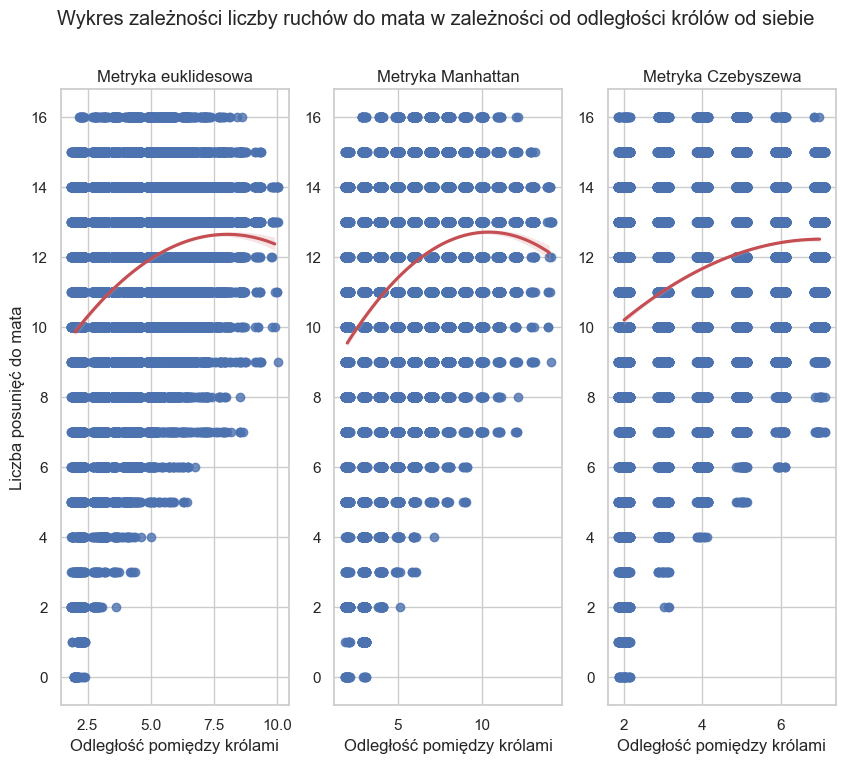

In [70]:
fig, axs = plt.subplots(1, 3, figsize=  (10, 8))

for i, name in enumerate(['euclidean-dist-between-kings',
       'manhattan-dist-between-kings', 'chebyshev-dist-between-kings']):
    sns.regplot(data=df1, x=name, y="win_depth_num", ax=axs[i], x_jitter=0.15, order=2, line_kws=dict(color="r"))


axs[0].set_title("Metryka euklidesowa")
axs[1].set_title("Metryka Manhattan")
axs[2].set_title("Metryka Czebyszewa")

axs[0].set(xlabel="Odległość pomiędzy królami", ylabel="Liczba posunięć do mata")
axs[1].set(xlabel="Odległość pomiędzy królami", ylabel="")
axs[2].set(xlabel="Odległość pomiędzy królami", ylabel="")


fig.suptitle("Wykres zależności liczby ruchów do mata w zależności od odległości królów od siebie")

# Odp2

Ogólnie każda z metryk ma podobny rozkład, czyli najlepiej jest gdy jest najmniejsza odległość (spodziewany wynik) i przy największych odległościach jest lepiej niż przy trochę bliższych (król czarnych jest wtedy bliżej krawędzi, co ułatwia zamatowanie). Najlepsza jest metryka Czebyszewa, bo jest ona najbliższ zależności liniowej. Jest to spodziewany wynik, gdyż król białych może dojść do pola króla czarnych zawsze w metryce Czebyszewa.

# Pytanie 3 [2pkt.]

Czy informacja o odległości czarnego króla od krawędzi planszy może być przydatna w określeniu w ilu ruchach zakończy się gra? Czy uzupełnienie tej informacji o odległość pomiędzy białym a czarnym królem z poprzedniego zadania może dodatkowo pomóc? Do tej analizy zignoruj sytuacje remisowe (white-depth-of-win = -1).

In [72]:
df["black-king-dist-to-wall"] = np.minimum(np.minimum(df["black-king-file"],(7 - df["black-king-file"])),np.minimum( (df["black-king-rank"]-1), (8 - df["black-king-rank"])))
df = df.loc[~(df["white-depth-of-win"] == "draw"),:]
df

,white-king-file,white-king-rank,white-rook-file,white-rook-rank,black-king-file,black-king-rank,white-depth-of-win,euclidean-dist-between-kings,manhattan-dist-between-kings,chebyshev-dist-between-kings,win_depth_num,black-king-dist-to-wall
2796,2,1,0,3,0,1,zero,2.000000,2,2,0,0
2797,2,1,0,4,0,1,zero,2.000000,2,2,0,0
2798,2,1,0,5,0,1,zero,2.000000,2,2,0,0
2799,2,1,0,6,0,1,zero,2.000000,2,2,0,0
2800,2,1,0,7,0,1,zero,2.000000,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
28051,1,1,6,7,4,5,sixteen,5.000000,7,4,16,3
28052,1,1,6,7,4,6,sixteen,5.830952,8,5,16,2
28053,1,1,6,7,4,7,sixteen,6.708204,9,6,16,1
28054,1,1,6,7,5,5,sixteen,5.656854,8,4,16,2


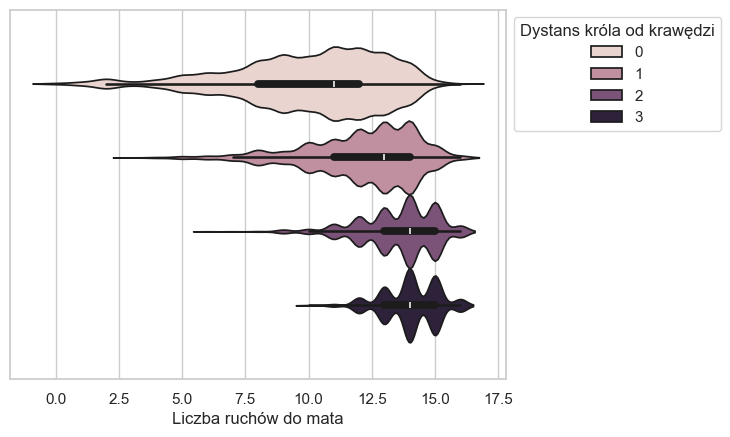

In [74]:
fig, ax = plt.subplots(1,1)
sns.violinplot(data=df, x ="win_depth_num", hue="black-king-dist-to-wall", ax=ax)

ax.set(xlabel="Liczba ruchów do mata")
plt.legend(title="Dystans króla od krawędzi")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

 # Odp3.1

 Na pewno będzie to mocno ułatwiało. Nie stwierdzając dokładnej zależności można zauważyć, że im król bliżej krawędzi, tym szybszy mat. Jednak nie znaczy to, że jeżeli jest blisko, to na pewno będzie szybki.

C:\Users\barki\AppData\Local\Temp\ipykernel_9236\1917071857.py:8: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.violinplot(data=df.loc[df["chebyshev-dist-between-kings"] == i+2, :], x ="win_depth_num", hue="black-king-dist-to-wall",legend=False, ax=axs[i], palette=sns.color_palette("rocket"))
C:\Users\barki\AppData\Local\Temp\ipykernel_9236\1917071857.py:8: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.violinplot(data=df.loc[df["chebyshev-dist-between-kings"] == i+2, :], x ="win_depth_num", hue="black-king-dist-to-wall",legend=False, ax=axs[i], palette=sns.color_palette("rocket"))
C:\Users\barki\AppData\Local\Temp\ipykernel_9236\1917071857.py:6: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.violinplot(data=df.loc[df["chebyshev-dist-between-kings"] == i+2, :], x ="win_depth_num", hue="black-king-dist-to-wall", ax=axs[i], palett

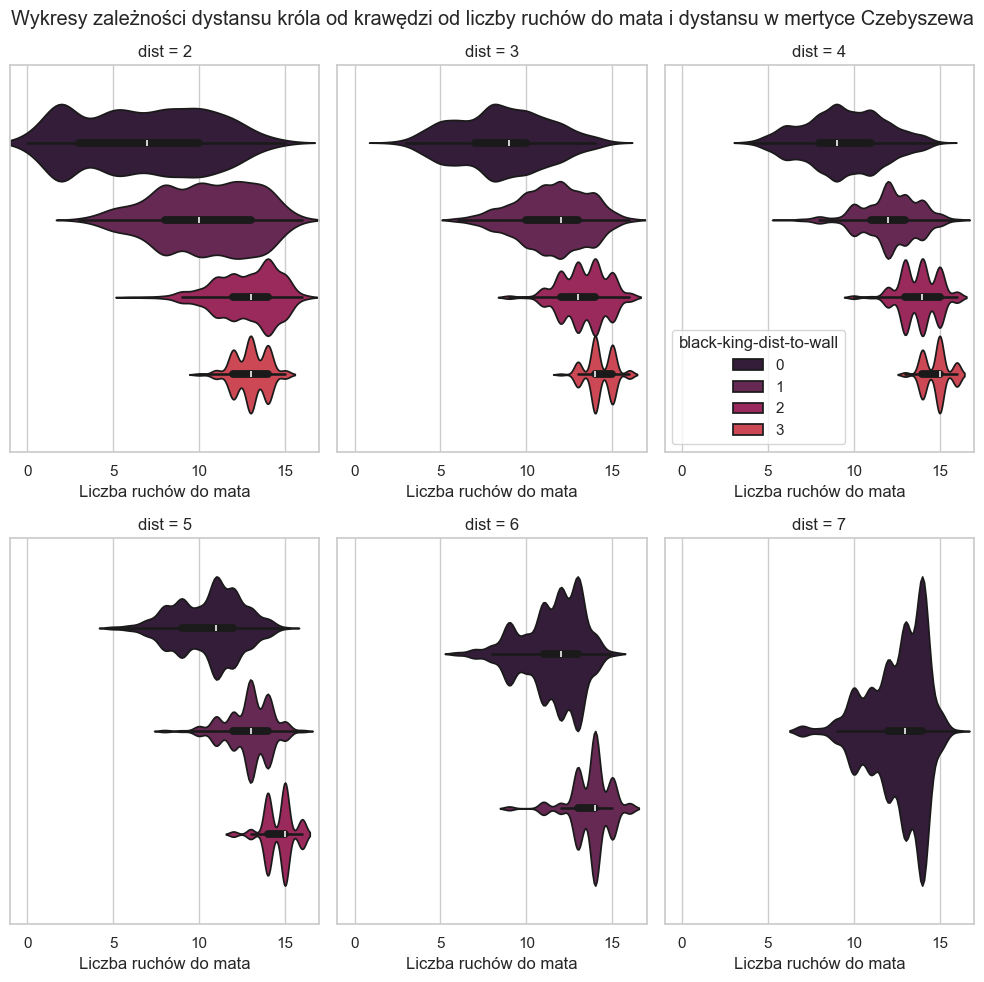

In [83]:
fig, axs = plt.subplots(2, 3, figsize=(10,10))

axs = axs.flatten()
for i in range(0, len(axs)):
    if i == 2:
        sns.violinplot(data=df.loc[df["chebyshev-dist-between-kings"] == i+2, :], x ="win_depth_num", hue="black-king-dist-to-wall", ax=axs[i], palette=sns.color_palette("rocket"))
    else:
        sns.violinplot(data=df.loc[df["chebyshev-dist-between-kings"] == i+2, :], x ="win_depth_num", hue="black-king-dist-to-wall",legend=False, ax=axs[i], palette=sns.color_palette("rocket"))

    axs[i].set(xlabel="Liczba ruchów do mata")
    axs[i].set_title(f"dist = {i+2}")
    axs[i].set_xlim(-1,17)



plt.suptitle("Wykresy zależności dystansu króla od krawędzi od liczby ruchów do mata i dystansu w mertyce Czebyszewa")
plt.tight_layout()
sns.move_legend(axs[2], "lower left")
plt.show()

# Odp3.2

Oczywiście odległości króli od siebie jest pomocna. Widać, że gdy króle są najbliżej oraz czarny jest blisko krawędzi to jest najłatwiej zamatować. Natomiast, gdy króle są daleko od siebie to zajmie to dłużej czasu.